# SVM and kernels

## Соколов Игорь Александрович, группа 573

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [48]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.gridspec as gridspec
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from itertools import product
from mlxtend.plotting import plot_decision_regions
import itertools

%matplotlib inline

Let's generate our dataset and take a look on it.

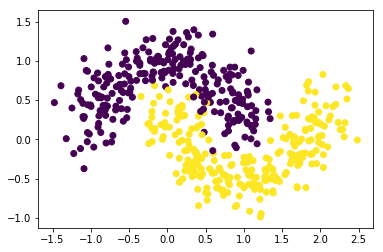

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [13]:
clf_lr = LogisticRegression(solver='saga', penalty='l2', C=1, max_iter=1000000) # add some params
clf_svm = SVC(kernel='linear', C = 1) # here too

X, y = moons_points, moons_labels
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=.35)

Распределение меток на train и на test

In [22]:
print ("number of the class 0\n on the train: {0} \n and on the test: {1}"
       .format(np.sum(y_train), np.sum(y_test)))
print ("\nnumber of the class 1\n on the train: {0} \n and on the test: {1}"
       .format(y_train.shape[0] - np.sum(y_train), y_test.shape[0] - np.sum(y_test)))

number of the class 0
 on the train: 163 
 and on the test: 87

number of the class 1
 on the train: 162 
 and on the test: 88


В качестве метрик будем использовать confusion_matrix, f_1 score, accuracy


Confusion matrix for LR
 [[75 13]
 [ 7 80]]
Accuracy for LR:  0.8857
f1-score for LR:  0.8889

Confusion matrix for SVM (linear kernel)
 [[75 13]
 [ 7 80]]
Accuracy for SVM (linear kernel):  0.8857
f1-score for SVM (linear kernel):  0.8889


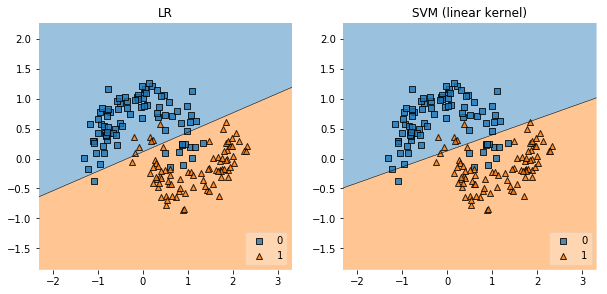

In [68]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 10))

for clf, label, grid in zip([clf_lr, clf_svm],['LR', 'SVM (linear kernel)'],
                            product([0, 1], repeat=2)):
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    
    #classification metrics
    
    print("\nConfusion matrix for {0}\n".format(label),confusion_matrix(y_test, y_predicted))
    
    print("Accuracy for {0}: ".format(label), round(accuracy_score(y_test, y_predicted),4))
    
    print("f1-score for {0}: ".format(label), round(f1_score(y_test, y_predicted),4))
    
    ax = plt.subplot(gs[grid[0], grid[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend="lower right")
    
    plt.title(label)
plt.show()

### YOUR CODE HERE

Значения метрик для SVM с линейным ядром не сильно отличается от значения для лог регрессии 

## 1.2 Kernel tirck

![keep-calm](keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [41]:
### YOUR CODE HERE

params_lr = {'C': np.linspace(0.01, 1, 10),
          'solver':('newton-cg', 'lbfgs', 'sag', 'saga')}

params_svm = {'C': np.linspace(0.01, 1, 10), 'degree' : list(range(1, 10))}

clf_lr = GridSearchCV(LogisticRegression(), params_lr, cv=5, n_jobs=-1)
clf_svm_poly = GridSearchCV(SVC(kernel='poly'), params_svm, cv=5, n_jobs=-1)
clf_svm_rbf = GridSearchCV(SVC(kernel='rbf'), params_svm, cv=5, n_jobs=-1)
clf_svm_sigmoid = GridSearchCV(SVC(kernel='sigmoid'), params_svm, cv=5, n_jobs=-1)

clf_ar = [clf_lr, clf_svm_poly, clf_svm_rbf,clf_svm_sigmoid]

for clf in clf_ar:
    clf.fit(X_train, y_train)


In [66]:
label_ar = ['LR', 'SVM (poly)', 'SVM (rbf)','SVM (sigmoid)']

Оптимальные параметры каждой из моделей

In [44]:
for clf, label in zip(clf_ar, label_ar):
    print("{0}:\n{1}\n".format(label, clf.best_params_))

Logistic Regression:
{'C': 0.34, 'solver': 'newton-cg'}

SVM (poly):
{'C': 0.78, 'degree': 1}

SVM (rbf):
{'C': 1.0, 'degree': 1}

SVM (sigmoid):
{'C': 0.01, 'degree': 1}



Обучим каждую из моделей на оптимальных параметрах

In [59]:
best_params = [clf.best_params_ for clf in clf_ar]

clf_opt_lr = LogisticRegression(**clf_lr.best_params_)
clf_opt_svm_poly = SVC(kernel='poly', **clf_svm_poly.best_params_)
clf_opt_svm_rbf = SVC(kernel='rbf',**clf_svm_rbf.best_params_)
clf_opt_svm_sigmoid = SVC(kernel='sigmoid',**clf_svm_sigmoid.best_params_)

clf_opt_ar = [clf_opt_lr, clf_opt_svm_poly, clf_opt_svm_rbf,clf_opt_svm_sigmoid]


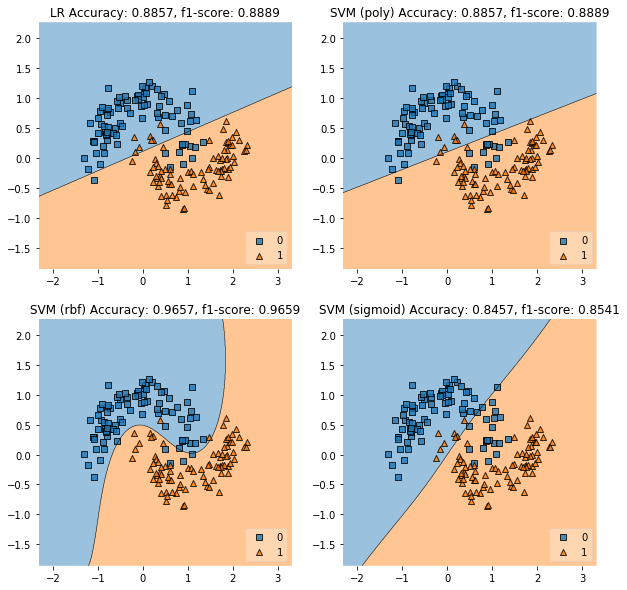

In [75]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 10))

for clf, label, grid in zip(clf_opt_ar, label_ar, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    
    ax = plt.subplot(gs[grid[0], grid[1]])
    
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend="lower right")    
    plt.title(label+" Accuracy: {0}, f1-score: {1}".
              format(round(accuracy_score(y_test, y_predicted),4),
                     round(f1_score(y_test, y_predicted),4)
                    )
             )
plt.show()


Ответы:
    

* What `degree` have you chosen and why?
    - оптимальной модели среди всех полимиальных со степенями из множества {1, 2, 3,...10} найденной по грид серчу соответсвует степень 1, по этому метрики качестав имеют те же значения, что и в пункте 1.1

* What have happenned with classification quality?
    - LR: подобранные "на глаз" параметры в пункте 1.1 совпали с оптимальными, поэтому качетво никак не поменялось 
    - SVM(rbf): качество заметно лучше как на обучении так и на тесте по сравнению с линеныйм ядром 
    - SVM(sigmoid): качество классификации снизилось по сравнению с линеныйм ядром 

* How did decision border changed for each kernel?
    - SVM(poly): не изменилась (причина описана в ответе на первый вопрос)
    - SVM(sigmoid): стала более крутой
    - SVM(rbf): стала нелинейной относительно исходного признакого пространства, но стала лучше разделять два класса (ггораздо повысилось качество) 


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [84]:
from sklearn.preprocessing import PolynomialFeatures
import tqdm

n_row  = 5
n_col  = 2
N = 10

gs = gridspec.GridSpec(n_row, n_col)
fig = plt.figure(figsize=(10, 10))
y_predicted_ar = np.zeros((N, X_test.shape[0]))

for (k, i) in tqdm.tqdm(enumerate(range(1, N + 1))): 
    poly = PolynomialFeatures(degree = i)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    lr = LogisticRegression(**clf_lr.best_params_)
    
    lr.fit(X_train_poly, y_train)
    y_predicted_ar[k] = lr.predict(X_test_poly)
    
    
### YOUR CODE HERE

10it [00:00, 54.16it/s]


<Figure size 720x720 with 0 Axes>

In [93]:
for (k, i) in tqdm.tqdm(enumerate(range(1, N + 1))):
    print("power:{0}, Accuracy: {1}, f1-score: {2}".format(
                    i,
                    round(accuracy_score(y_test, y_predicted_ar[k]),4),
                     round(f1_score(y_test, y_predicted_ar[k]),4)))
power_opt = np.argmax(np.array([accuracy_score(y_test, y_predicted_ar[k]) for k in range(N)])) + 1

10it [00:00, 730.47it/s]

power:1, Accuracy: 0.8857, f1-score: 0.8889
power:2, Accuracy: 0.8857, f1-score: 0.8889
power:3, Accuracy: 0.9543, f1-score: 0.9556
power:4, Accuracy: 0.9657, f1-score: 0.9663
power:5, Accuracy: 0.96, f1-score: 0.9605
power:6, Accuracy: 0.9714, f1-score: 0.9714
power:7, Accuracy: 0.9657, f1-score: 0.9659
power:8, Accuracy: 0.9657, f1-score: 0.9659
power:9, Accuracy: 0.9657, f1-score: 0.9659
power:10, Accuracy: 0.9657, f1-score: 0.9659


In [95]:
print ("обучим теперь svm(poly) с полиномом {0}-й степени и подсчитаем значения метрик".format(power_opt))

обучим теперь svm(poly) с полиномом 6-й степени и подсчитаем значения метрик


In [98]:
clf_poly = SVC(kernel='poly', degree=power_opt)

y_predicted = clf_poly.fit(X_train, y_train).predict(X_test)

print("svm(poly) with power {0} Accuracy: {1}, f1-score: {2}".
              format(power_opt,
                  round(accuracy_score(y_test, y_predicted),4),
                     round(f1_score(y_test, y_predicted),4)))


svm(poly) with power 6 Accuracy: 0.7371, f1-score: 0.6515


Вывод:
* Comare SVM's results with this solution (quality, borders type)
    -  при наилучшей степени полинома (которая дает наилучшее качество на train) лог регрессия получилась даже лучше чем SVM(rbf), а именно:
    
    SVM(rbf): Accuracy: 0.9657, f1-score: 0.9659
    
    LR power 6: Accuracy: 0.9714, f1-score: 0.9714

* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

    - качество классификации лог регрессии обученного в спрямляемом пр-ве гораздо лучше чем SVM(poly power=6), а именно:
    
    LR: Accuracy: 0.9714, f1-score: 0.9714
    
    SVM(poly power=6): Accuracy: 0.7371, f1-score: 0.6515


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

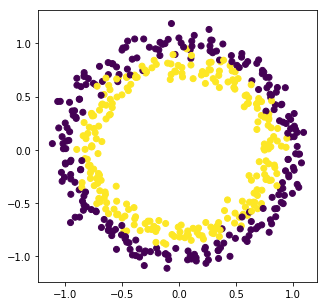

In [99]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.



Для начала grid search для svm(rbf)

{'C': 0.89}
Accuracy for svm rbf:  0.9371
f1-score for svm rbf:  0.9325


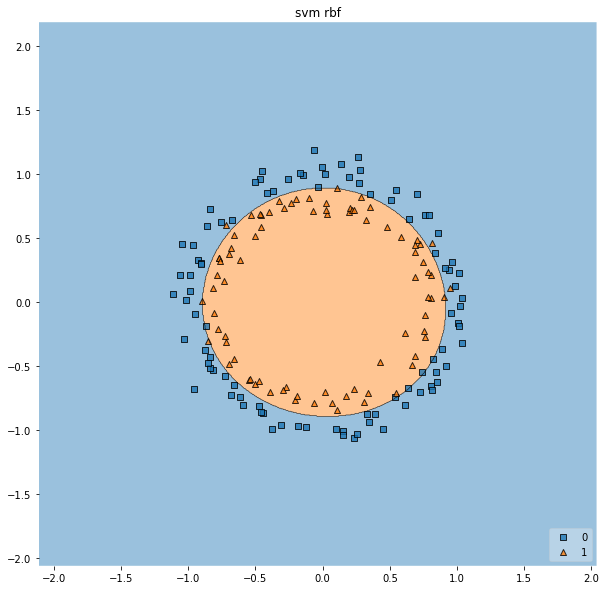

In [105]:
X_train, X_test, y_train, y_test = train_test_split(circles_points, circles_labels, test_size=.35)

params_svm = {'C': np.linspace(0.01, 1, 10)}

clf = GridSearchCV(SVC(kernel='rbf'), params_svm, cv=5, n_jobs=-1)
clf.fit(X_train,y_train)

opt_params = clf.best_params_
print (opt_params)

clf_hp_svm_rbf = SVC(kernel='rbf', **opt_params)

y_pred = clf_hp_svm_rbf.fit(X_train,y_train).predict(X_test)

fig = plt.figure(figsize=(10, 10))
label = "svm rbf"

print("Accuracy for {0}: ".format(label), round(accuracy_score(y_test, y_pred),4))
print("f1-score for {0}: ".format(label), round(f1_score(y_test, y_pred),4))

fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend="lower right")

plt.title(label)
plt.show()

Попробуем теперь так: полиномиальное преобразование +  grid search для каждого спрямляющего пространства 
    для каждой из моделей выше

In [113]:
params_lr = {'C': np.linspace(0.01, 1, 10)}

params_svm = {'C': np.linspace(0.01, 1, 10), 'degree' : list(range(1, 20))}

best_params_ar = []

clf_hp_lr = GridSearchCV(LogisticRegression(solver='saga'), params_lr, cv=5, n_jobs=-1)
clf_hp_svm_poly = GridSearchCV(SVC(kernel='poly'), params_svm, cv=5, n_jobs=-1)
clf_hp_svm_rbf = GridSearchCV(SVC(kernel='rbf'), params_svm, cv=5, n_jobs=-1)
clf_hp_svm_sigmoid = GridSearchCV(SVC(kernel='sigmoid'), params_svm, cv=5, n_jobs=-1)

clf_ar = [clf_hp_lr, clf_hp_svm_poly, clf_hp_svm_rbf,clf_hp_svm_sigmoid]


for (k, i) in tqdm.tqdm(enumerate(range(1, N + 1)), total=N):
    best_params_ar.append([])
    poly = PolynomialFeatures(degree = i)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    for clf in clf_ar:
        clf.fit(X_train_poly, y_train)
        best_params_ar[k].append(clf.best_params_)

100%|██████████| 10/10 [00:49<00:00,  6.04s/it]


In [114]:
y_predicted_ar = []

for (k, i) in tqdm.tqdm(enumerate(range(1, N + 1)), total=N):
    y_predicted_ar.append([])
    clf_hp_opt_lr          = LogisticRegression(**best_params_ar[k][0])
    clf_hp_opt_svm_poly    = SVC(kernel='poly', **best_params_ar[k][1])
    clf_hp_opt_svm_rbf     = SVC(kernel='rbf',**best_params_ar[k][2])
    clf_hp_opt_svm_sigmoid = SVC(kernel='sigmoid',**best_params_ar[k][3])
    clf_hp_opt_ar = [clf_hp_opt_lr, clf_hp_opt_svm_poly, clf_hp_opt_svm_rbf,clf_hp_opt_svm_sigmoid]
    poly = PolynomialFeatures(degree = i)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    for clf in clf_hp_opt_ar:
        y_predicted_ar[k].append(clf.fit(X_train_poly, y_train).predict(X_test_poly))

100%|██████████| 10/10 [00:00<00:00, 47.70it/s]


In [115]:
for (k, i) in tqdm.tqdm(enumerate(range(1, N + 1))):
    print ("power: ",i)
    for j, (clf,label) in enumerate(zip(clf_hp_opt_ar, label_ar)):
        print("clf:{0}, Accuracy: {1}, f1-score: {2}".format(
                    label,
                    round(accuracy_score(y_test, y_predicted_ar[k][j]),4),
                     round(f1_score(y_test, y_predicted_ar[k][j]),4)))
        
#power_opt = np.argmax(np.array([accuracy_score(y_test, y_predicted_ar[k]) for k in range(N)])) + 1

10it [00:00, 115.73it/s]

power:  1
clf:LR, Accuracy: 0.4914, f1-score: 0.6482
clf:SVM (poly), Accuracy: 0.92, f1-score: 0.9186
clf:SVM (rbf), Accuracy: 0.9429, f1-score: 0.939
clf:SVM (sigmoid), Accuracy: 0.4686, f1-score: 0.6381
power:  2
clf:LR, Accuracy: 0.9486, f1-score: 0.9441
clf:SVM (poly), Accuracy: 0.9314, f1-score: 0.9286
clf:SVM (rbf), Accuracy: 0.9371, f1-score: 0.9333
clf:SVM (sigmoid), Accuracy: 0.9257, f1-score: 0.9231
power:  3
clf:LR, Accuracy: 0.9429, f1-score: 0.9398
clf:SVM (poly), Accuracy: 0.8686, f1-score: 0.8729
clf:SVM (rbf), Accuracy: 0.92, f1-score: 0.9167
clf:SVM (sigmoid), Accuracy: 0.8229, f1-score: 0.836
power:  4
clf:LR, Accuracy: 0.9143, f1-score: 0.9091
clf:SVM (poly), Accuracy: 0.8743, f1-score: 0.8791
clf:SVM (rbf), Accuracy: 0.9143, f1-score: 0.9112
clf:SVM (sigmoid), Accuracy: 0.8914, f1-score: 0.8939
power:  5
clf:LR, Accuracy: 0.92, f1-score: 0.9146
clf:SVM (poly), Accuracy: 0.8571, f1-score: 0.8649
clf:SVM (rbf), Accuracy: 0.9086, f1-score: 0.908
clf:SVM (sigmoid), Accu

Теперь найдем лучшую

In [116]:
acc = np.zeros((N, len(clf_hp_opt_ar)))
for (k, i) in tqdm.tqdm(enumerate(range(1, N + 1))):
    for j, (clf,label) in enumerate(zip(clf_hp_opt_ar, label_ar)):
        acc[k,j] = accuracy_score(y_test, y_predicted_ar[k][j])

10it [00:00, 1338.92it/s]


In [121]:
acc

array([[0.49142857, 0.92      , 0.94285714, 0.46857143],
       [0.94857143, 0.93142857, 0.93714286, 0.92571429],
       [0.94285714, 0.86857143, 0.92      , 0.82285714],
       [0.91428571, 0.87428571, 0.91428571, 0.89142857],
       [0.92      , 0.85714286, 0.90857143, 0.85714286],
       [0.92      , 0.8       , 0.89142857, 0.8       ],
       [0.92      , 0.78857143, 0.85142857, 0.78857143],
       [0.92      , 0.76      , 0.82285714, 0.76      ],
       [0.92      , 0.74857143, 0.8       , 0.74857143],
       [0.92      , 0.73142857, 0.78285714, 0.73714286]])

In [122]:
np.argmax(acc)

4

следовательно наибольшая точность на тесте у LR (power = 2) 

In [127]:
print ("Accuracy: {0}, f1_score: {1}, ".format(round(accuracy_score(y_test, y_predicted_ar[1][0]), 4),
                    round(f1_score(y_test, y_predicted_ar[1][0]),4)) )

Accuracy: 0.9486, f1_score: 0.9441, 


And even more:

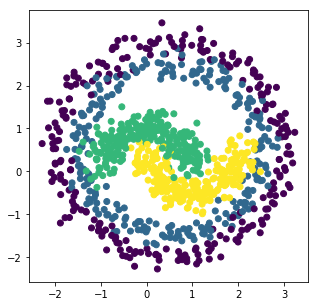

In [133]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Тут сделаем все аналогично предыдущему пункту

Для начала grid search для svm(rbf)

{'C': 0.78}
Accuracy of the class 0: 0.9771428571428571
f1_score of the class 0: 0.9493670886075949

Accuracy of the class 1: 0.9685714285714285
f1_score of the class 1: 0.9325153374233128

Accuracy of the class 2: 0.9771428571428571
f1_score of the class 2: 0.9550561797752809

Accuracy of the class 3: 0.9685714285714285
f1_score of the class 3: 0.9452736318407959



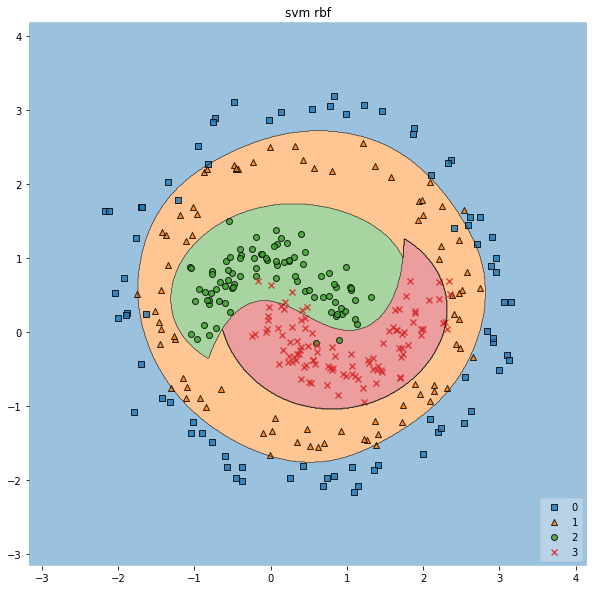

In [138]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=.35)

params_svm = {'C': np.linspace(0.01, 1, 10)}

le = preprocessing.LabelEncoder()

y_train_enc = le.fit(y_train).transform(y_train)
y_test_enc = le.transform(y_test)

clf = GridSearchCV(SVC(kernel='rbf'), params_svm, cv=5, n_jobs=-1)
clf.fit(X_train, y_train_enc)

opt_params = clf.best_params_

print (opt_params)

clf_hp_svm_rbf = SVC(kernel='rbf', **opt_params)

y_pred = clf_hp_svm_rbf.fit(X_train, y_train_enc).predict(X_test)

fig = plt.figure(figsize=(10, 10))
label = "svm rbf"

n_classes = 4

for i in range(n_classes):
    print('Accuracy of the class {0}: {1}'
             ''.format(le.classes_[i], accuracy_score(np.int64(y_test_enc==i), np.int64(y_pred==i))))
    print('f1_score of the class {0}: {1}\n'
             ''.format(le.classes_[i], f1_score(np.int64(y_test_enc==i), np.int64(y_pred==i))))

fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend="lower right")

plt.title(label)
plt.show()

In [139]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=.35)

le = preprocessing.LabelEncoder()

y_train_enc = le.fit(y_train).transform(y_train)
y_test_enc = le.transform(y_test)

params_lr = {'C': np.linspace(0.01, 1, 10)}

params_svm = {'C': np.linspace(0.01, 1, 10), 'degree' : list(range(1, 20))}

best_params_ar = []

clf_hp_lr = GridSearchCV(LogisticRegression(solver='saga', max_iter = 100000), params_lr, cv=5, n_jobs=-1)
clf_hp_svm_poly = GridSearchCV(SVC(kernel='poly', max_iter = 100000), params_svm, cv=5, n_jobs=-1)
clf_hp_svm_rbf = GridSearchCV(SVC(kernel='rbf', max_iter = 100000), params_svm, cv=5, n_jobs=-1)
clf_hp_svm_sigmoid = GridSearchCV(SVC(kernel='sigmoid', max_iter = 100000), params_svm, cv=5, n_jobs=-1)

clf_ar = [clf_hp_lr, clf_hp_svm_poly, clf_hp_svm_rbf,clf_hp_svm_sigmoid]

for (k, i) in tqdm.tqdm(enumerate(range(1, N + 1)), total=N):
    best_params_ar.append([])
    poly = PolynomialFeatures(degree = i)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    for clf in clf_ar:
        clf.fit(X_train_poly, y_train_enc)
        best_params_ar[k].append(clf.best_params_)
        




  0%|          | 0/10 [00:00<?, ?it/s]


 10%|█         | 1/10 [00:19<02:52, 19.17s/it]


 20%|██        | 2/10 [00:50<03:03, 22.90s/it]


 30%|███       | 3/10 [01:50<03:58, 34.01s/it]


 40%|████      | 4/10 [02:50<04:10, 41.70s/it]


 50%|█████     | 5/10 [04:31<04:57, 59.46s/it]


 60%|██████    | 6/10 [06:34<05:14, 78.63s/it]


 70%|███████   | 7/10 [08:51<04:48, 96.23s/it]


 80%|████████  | 8/10 [11:12<03:39, 109.67s/it]


 90%|█████████ | 9/10 [14:27<02:15, 135.14s/it]


100%|██████████| 10/10 [17:33<00:00, 150.29s/it]

Посмотрим на наилучшие параметры

In [142]:
for (k, i) in tqdm.tqdm(enumerate(range(1, N + 1)), total=N):
    print ("power: ",i)
    for j,(clf,label) in enumerate(zip(clf_ar, label_ar)):
        print ("clf: ", label, best_params_ar[k][j])




  0%|          | 0/10 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 448.98it/s]

power:  1
clf:  LR {'C': 0.01}
clf:  SVM (poly) {'C': 0.89, 'degree': 3}
clf:  SVM (rbf) {'C': 1.0, 'degree': 1}
clf:  SVM (sigmoid) {'C': 0.12, 'degree': 1}
power:  2
clf:  LR {'C': 0.89}
clf:  SVM (poly) {'C': 0.89, 'degree': 2}
clf:  SVM (rbf) {'C': 1.0, 'degree': 1}
clf:  SVM (sigmoid) {'C': 0.12, 'degree': 1}
power:  3
clf:  LR {'C': 1.0}
clf:  SVM (poly) {'C': 0.78, 'degree': 1}
clf:  SVM (rbf) {'C': 0.89, 'degree': 1}
clf:  SVM (sigmoid) {'C': 0.01, 'degree': 1}
power:  4
clf:  LR {'C': 1.0}
clf:  SVM (poly) {'C': 1.0, 'degree': 1}
clf:  SVM (rbf) {'C': 1.0, 'degree': 1}
clf:  SVM (sigmoid) {'C': 0.12, 'degree': 1}
power:  5
clf:  LR {'C': 0.89}
clf:  SVM (poly) {'C': 1.0, 'degree': 1}
clf:  SVM (rbf) {'C': 1.0, 'degree': 1}
clf:  SVM (sigmoid) {'C': 0.01, 'degree': 1}
power:  6
clf:  LR {'C': 0.56}
clf:  SVM (poly) {'C': 1.0, 'degree': 1}
clf:  SVM (rbf) {'C': 1.0, 'degree': 1}
clf:  SVM (sigmoid) {'C': 0.01, 'degree': 1}
power:  7
clf:  LR {'C': 0.01}
clf:  SVM (poly) {'C': 1.

In [143]:
y_predicted_ar = []

for (k, i) in tqdm.tqdm(enumerate(range(1, N + 1)), total=N):
    y_predicted_ar.append([])
    clf_hp_opt_lr          = LogisticRegression(**best_params_ar[k][0])
    clf_hp_opt_svm_poly    = SVC(kernel='poly', **best_params_ar[k][1])
    clf_hp_opt_svm_rbf     = SVC(kernel='rbf',**best_params_ar[k][2])
    clf_hp_opt_svm_sigmoid = SVC(kernel='sigmoid',**best_params_ar[k][3])
    
    clf_hp_opt_ar = [clf_hp_opt_lr, clf_hp_opt_svm_poly, clf_hp_opt_svm_rbf,clf_hp_opt_svm_sigmoid]
    poly = PolynomialFeatures(degree = i)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    for clf in clf_hp_opt_ar:
        y_predicted_ar[k].append(clf.fit(X_train_poly, y_train_enc).predict(X_test_poly))
n_classes = 4





  0%|          | 0/10 [00:00<?, ?it/s]


 30%|███       | 3/10 [00:00<00:00, 20.79it/s]


 50%|█████     | 5/10 [00:00<00:00, 16.32it/s]


 60%|██████    | 6/10 [00:00<00:00, 10.41it/s]


 70%|███████   | 7/10 [00:00<00:00,  7.10it/s]


 80%|████████  | 8/10 [00:01<00:00,  4.90it/s]


 90%|█████████ | 9/10 [00:05<00:01,  1.50s/it]


100%|██████████| 10/10 [00:18<00:00,  5.05s/it]

In [146]:
for k in tqdm.tqdm(range(N), total=N):
    print ("power: ", k + 1)
    for j, (clf,label) in enumerate(zip(clf_hp_opt_ar, label_ar)):
        print ("clf: ", label)
        for i in range(n_classes):
            print('Accuracy of the class {0}: {1}'
                     ''.format(i, accuracy_score(np.int64(y_test_enc==i), np.int64(y_predicted_ar[k][j]==i))))
            print('f1_score of the class {0}: {1}\n'
                     ''.format(i, f1_score(np.int64(y_test_enc==i), np.int64(y_predicted_ar[k][j]==i))))
        




  0%|          | 0/10 [00:00<?, ?it/s]


 50%|█████     | 5/10 [00:00<00:00, 40.66it/s]

power:  1
clf:  LR
Accuracy of the class 0: 0.6885714285714286
f1_score of the class 0: 0.09917355371900825

Accuracy of the class 1: 0.7314285714285714
f1_score of the class 1: 0.020833333333333336

Accuracy of the class 2: 0.6685714285714286
f1_score of the class 2: 0.48214285714285715

Accuracy of the class 3: 0.6771428571428572
f1_score of the class 3: 0.5637065637065637

clf:  SVM (poly)
Accuracy of the class 0: 0.9685714285714285
f1_score of the class 0: 0.9316770186335404

Accuracy of the class 1: 0.9485714285714286
f1_score of the class 1: 0.9010989010989011

Accuracy of the class 2: 0.9571428571428572
f1_score of the class 2: 0.9142857142857144

Accuracy of the class 3: 0.9485714285714286
f1_score of the class 3: 0.9010989010989011

clf:  SVM (rbf)
Accuracy of the class 0: 0.9628571428571429
f1_score of the class 0: 0.9202453987730062

Accuracy of the class 1: 0.9428571428571428
f1_score of the class 1: 0.8888888888888888

Accuracy of the class 2: 0.9628571428571429
f1_score o




 90%|█████████ | 9/10 [00:00<00:00, 40.37it/s]


100%|██████████| 10/10 [00:00<00:00, 39.63it/s]

f1_score of the class 0: 0.9316770186335404

Accuracy of the class 1: 0.9485714285714286
f1_score of the class 1: 0.8977272727272728

Accuracy of the class 2: 0.9228571428571428
f1_score of the class 2: 0.8601036269430051

Accuracy of the class 3: 0.9142857142857143
f1_score of the class 3: 0.8235294117647058

clf:  SVM (poly)
Accuracy of the class 0: 0.9742857142857143
f1_score of the class 0: 0.9433962264150944

Accuracy of the class 1: 0.9571428571428572
f1_score of the class 1: 0.9162011173184358

Accuracy of the class 2: 0.9714285714285714
f1_score of the class 2: 0.9438202247191012

Accuracy of the class 3: 0.9657142857142857
f1_score of the class 3: 0.9347826086956522

clf:  SVM (rbf)
Accuracy of the class 0: 0.72
f1_score of the class 0: 0.6230769230769231

Accuracy of the class 1: 0.8
f1_score of the class 1: 0.3859649122807018

Accuracy of the class 2: 0.9771428571428571
f1_score of the class 2: 0.9534883720930233

Accuracy of the class 3: 0.8971428571428571
f1_score of the c

Слишком много данных и сложно понять какой лучше

Запишем метрики средние accuracy по классам для каждого классикатора в матрицу и найдем наилучший классификатор

In [152]:
clf_matrix_opt = np.zeros((N, len(clf_hp_opt_ar), ))
for k in tqdm.tqdm(range(N), total=N):
    for j, (clf,label) in enumerate(zip(clf_hp_opt_ar, label_ar)):
        clf_matrix_opt[k,j] = np.mean([accuracy_score(np.int64(y_test_enc==l), 
                                                          np.int64(y_predicted_ar[k][j]==l)) 
                                           for l in range(n_classes)])




  0%|          | 0/10 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 318.22it/s]

In [161]:
clf_matrix_opt

array([[0.69142857, 0.95571429, 0.95714286, 0.62428571],
       [0.90428571, 0.95857143, 0.96857143, 0.69285714],
       [0.91714286, 0.96142857, 0.96571429, 0.6       ],
       [0.96      , 0.96      , 0.94857143, 0.60285714],
       [0.96428571, 0.96285714, 0.92714286, 0.59571429],
       [0.96428571, 0.96571429, 0.89428571, 0.59857143],
       [0.92857143, 0.96428571, 0.87857143, 0.59285714],
       [0.93714286, 0.95571429, 0.86142857, 0.59571429],
       [0.93857143, 0.96714286, 0.84857143, 0.59428571],
       [0.93285714, 0.95285714, 0.84      , 0.59571429]])

In [172]:
argmax_clf_matrix = np.argmax(clf_matrix_opt)
i,j = int (argmax_clf_matrix/clf_matrix_opt.shape[1]), (argmax_clf_matrix%clf_matrix_opt.shape[1])

print("Классификатор с наилучшей средней точностью: {0}\n\
      с параметрами: {1}\n\
      в спрямляющем пространстве полиномов степени {2}\n\
      имеющего точность и полноту:"
      .format( label_ar[j], clf_hp_opt_ar[j] ,np.arange(1, N+1)[i]))

for k in range(n_classes):
    print('Accuracy of the class {0}: {1}'
                     ''.format(k, accuracy_score(np.int64(y_test_enc==k), np.int64(y_predicted_ar[i][j]==k))))
    print('f1_score of the class {0}: {1}\n'
                     ''.format(k, f1_score(np.int64(y_test_enc==k), np.int64(y_predicted_ar[i][j]==k))))

Классификатор с наилучшей средней точностью: SVM (rbf)
      с параметрами: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
      в спрямляющем пространстве полиномов степени 2
      имеющего точность и полноту:
Accuracy of the class 0: 0.9628571428571429
f1_score of the class 0: 0.9192546583850932

Accuracy of the class 1: 0.9485714285714286
f1_score of the class 1: 0.8988764044943819

Accuracy of the class 2: 0.9828571428571429
f1_score of the class 2: 0.9655172413793104

Accuracy of the class 3: 0.98
f1_score of the class 3: 0.9625668449197862



* результат немного лучше чем в предыдущем случае

Justify the results in a few phrases.

* Переход в спрямляющее пространоство существенно помогает повысить качество классификации
 - Было показано в обоих "Harder problem": наилучшие резальтаты получились с ядром "rbf" и degree=2 
 - Для первой задачи получилось
 Accuracy: 0.9486, f1_score: 0.9441, 
 - Для второй

In [174]:
for k in range(n_classes):
    print('Accuracy of the class {0}: {1}'
                     ''.format(k, accuracy_score(np.int64(y_test_enc==k), np.int64(y_predicted_ar[i][j]==k))))
    print('f1_score of the class {0}: {1}\n'
                     ''.format(k, f1_score(np.int64(y_test_enc==k), np.int64(y_predicted_ar[i][j]==k))))

Accuracy of the class 0: 0.9628571428571429
f1_score of the class 0: 0.9192546583850932

Accuracy of the class 1: 0.9485714285714286
f1_score of the class 1: 0.8988764044943819

Accuracy of the class 2: 0.9828571428571429
f1_score of the class 2: 0.9655172413793104

Accuracy of the class 3: 0.98
f1_score of the class 3: 0.9625668449197862

